In [36]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "adult-income-census-dataset"

# **Import**

In [37]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & Structure**

In [38]:
data <- read.csv('/kaggle/input/adult-income-census-dataset/adult.csv')

In [39]:
str(data)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  90 82 66 54 41 34 38 74 68 41 ...
 $ workclass     : chr  "?" "Private" "?" "Private" ...
 $ fnlwgt        : int  77053 132870 186061 140359 264663 216864 150601 88638 422013 70037 ...
 $ education     : chr  "HS-grad" "HS-grad" "Some-college" "7th-8th" ...
 $ education.num : int  9 9 10 4 10 9 6 16 9 10 ...
 $ marital.status: chr  "Widowed" "Widowed" "Widowed" "Divorced" ...
 $ occupation    : chr  "?" "Exec-managerial" "?" "Machine-op-inspct" ...
 $ relationship  : chr  "Not-in-family" "Not-in-family" "Unmarried" "Unmarried" ...
 $ race          : chr  "White" "White" "Black" "White" ...
 $ sex           : chr  "Female" "Female" "Female" "Female" ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  4356 4356 4356 3900 3900 3770 3770 3683 3683 3004 ...
 $ hours.per.week: int  40 18 40 40 40 45 40 20 40 60 ...
 $ native.country: chr  "United-States" "United-States" "United-States" "United-States" 

In [40]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,32561,3.858165e+01,1.364043e+01,37,3.768982e+01,14.8260,17,90,73,0.55869189,-0.1664603,7.559260e-02
workclass*,2,32561,4.868892e+00,1.455960e+00,5,4.963031e+00,0.0000,1,9,8,-0.75195473,1.6816568,8.068643e-03
fnlwgt,3,32561,1.897784e+05,1.055500e+05,178356,1.808024e+05,88798.8444,12285,1484705,1472420,1.44684678,6.2171056,5.849372e+02
education*,4,32561,1.129821e+01,3.870264e+00,12,1.180782e+01,2.9652,1,16,15,-0.93395638,0.6801404,2.144824e-02
education.num,5,32561,1.008068e+01,2.572720e+00,10,1.018772e+01,1.4826,1,16,15,-0.31164715,0.6229415,1.425751e-02
marital.status*,6,32561,3.611836e+00,1.506222e+00,3,3.649200e+00,2.9652,1,7,6,-0.01350689,-0.5363337,8.347185e-03
occupation*,7,32561,7.572740e+00,4.228857e+00,8,7.503436e+00,5.9304,1,15,14,0.11457276,-1.2348238,2.343549e-02
relationship*,8,32561,2.446362e+00,1.606771e+00,2,2.247764e+00,1.4826,1,6,5,0.78674529,-0.7685617,8.904409e-03
race*,9,32561,4.665858e+00,8.488056e-01,5,4.896080e+00,0.0000,1,5,4,-2.43516189,4.8748936,4.703914e-03


In [41]:
summary(data)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

**Check missing value**

In [42]:
colSums(is.na(data))

age      workclass         fnlwgt      education  education.num 
             0              0              0              0              0 
marital.status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         income 
             0              0              0              0              0

**duplicate check**

In [43]:
sum(duplicated(data))

[1] 24

# **2. Data Transfrom**

In [44]:
data <- unique(data)
sum(duplicated(data))

[1] 0

In [45]:
data$workclass <- ifelse(data$workclass == '?' , 'Not_responding', data$workclass)
data$occupation <- ifelse(data$occupation == '?', 'Not_responding', data$occupation)

In [46]:
#column type conversion

for(i in 1:ncol(data))
{
    if(is.character(data[,i]) == T)
        data[,i] <- as.factor(data[,i])
}

**Data Check**

In [47]:
head(data)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,90,Not_responding,77053,HS-grad,9,Widowed,Not_responding,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,Not_responding,186061,Some-college,10,Widowed,Not_responding,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


# **3. Data Visualization**

In [48]:
options(repr.plot.width = 13.0, repr.plot.height = 13.0)

**Histogram**

In [49]:
p1 <- ggplot(data, aes(x= age)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('age Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <- ggplot(data, aes(x= fnlwgt)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('fnlwgt Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <- ggplot(data, aes(x= education.num)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('education.num Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <- ggplot(data, aes(x= capital.gain)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('capital.gain Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <- ggplot(data, aes(x= capital.loss)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('capital.loss Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <- ggplot(data, aes(x= hours.per.week)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('hours.per.week Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

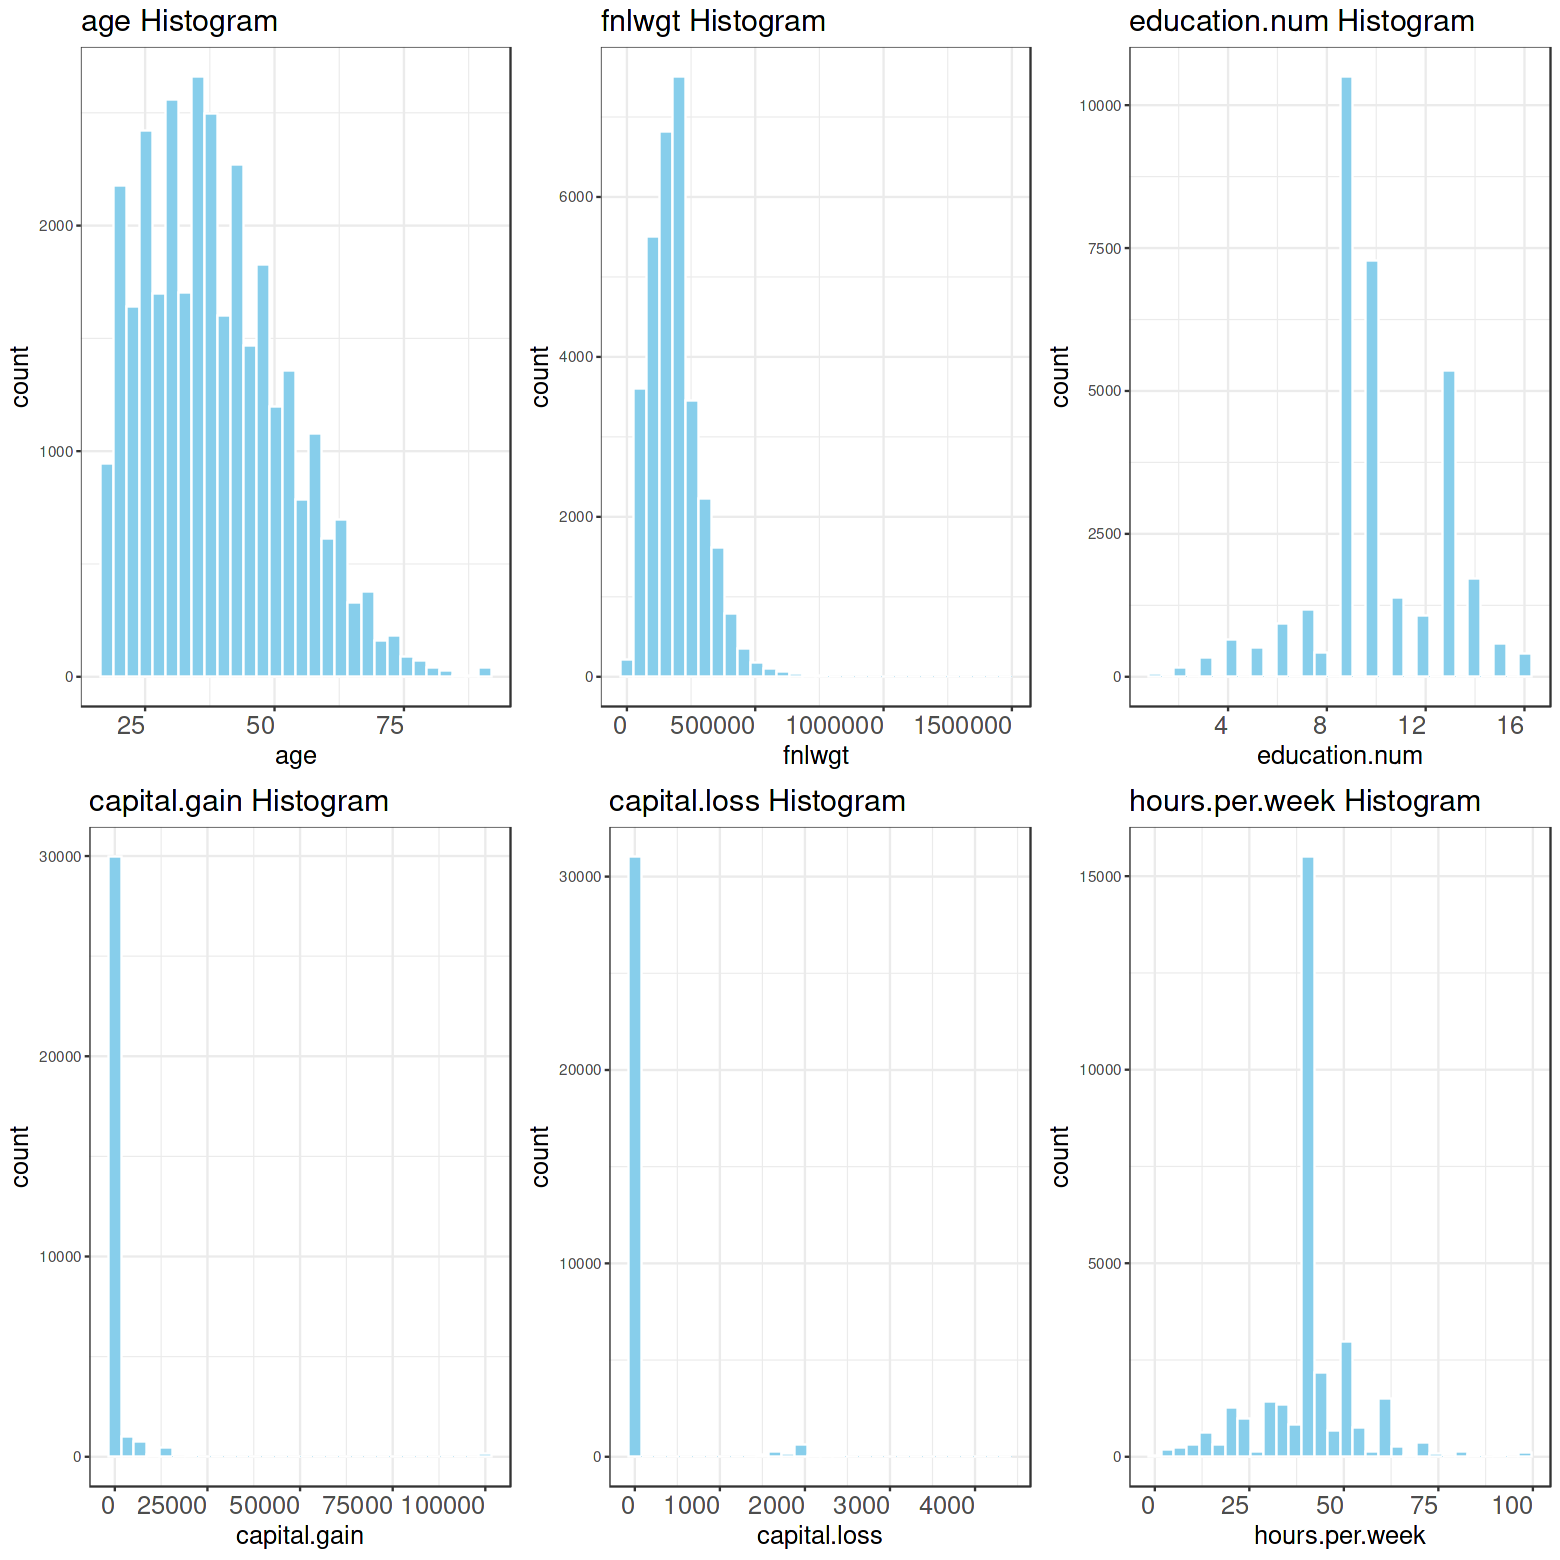

In [50]:
grid.arrange(p1,p2,p3,p4,p5,p6 , ncol = 3)

**Barplot**

In [51]:
cat_cols <- c('workclass','education','marital.status','occupation','relationship','race','sex','native.country','income')

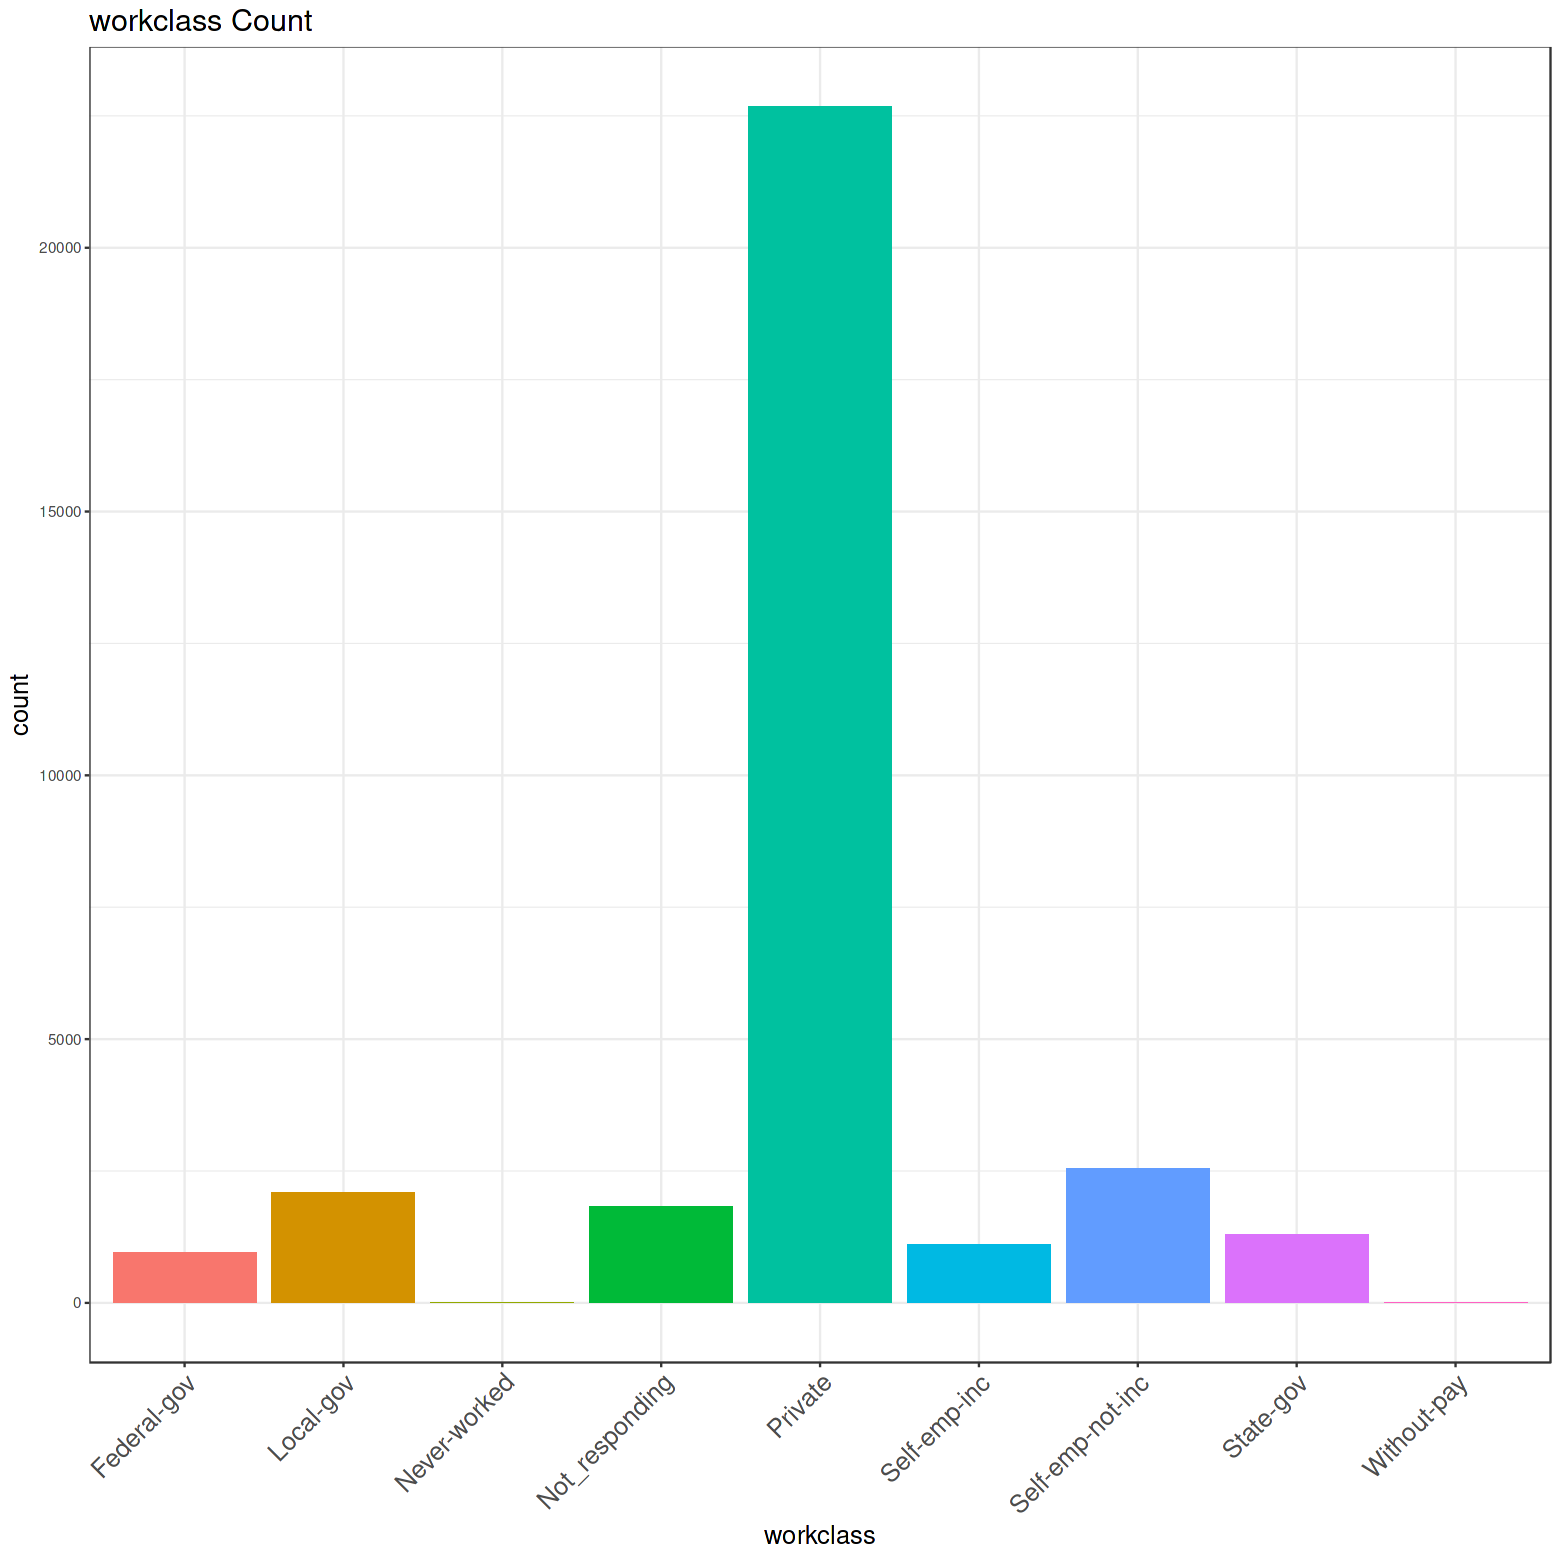

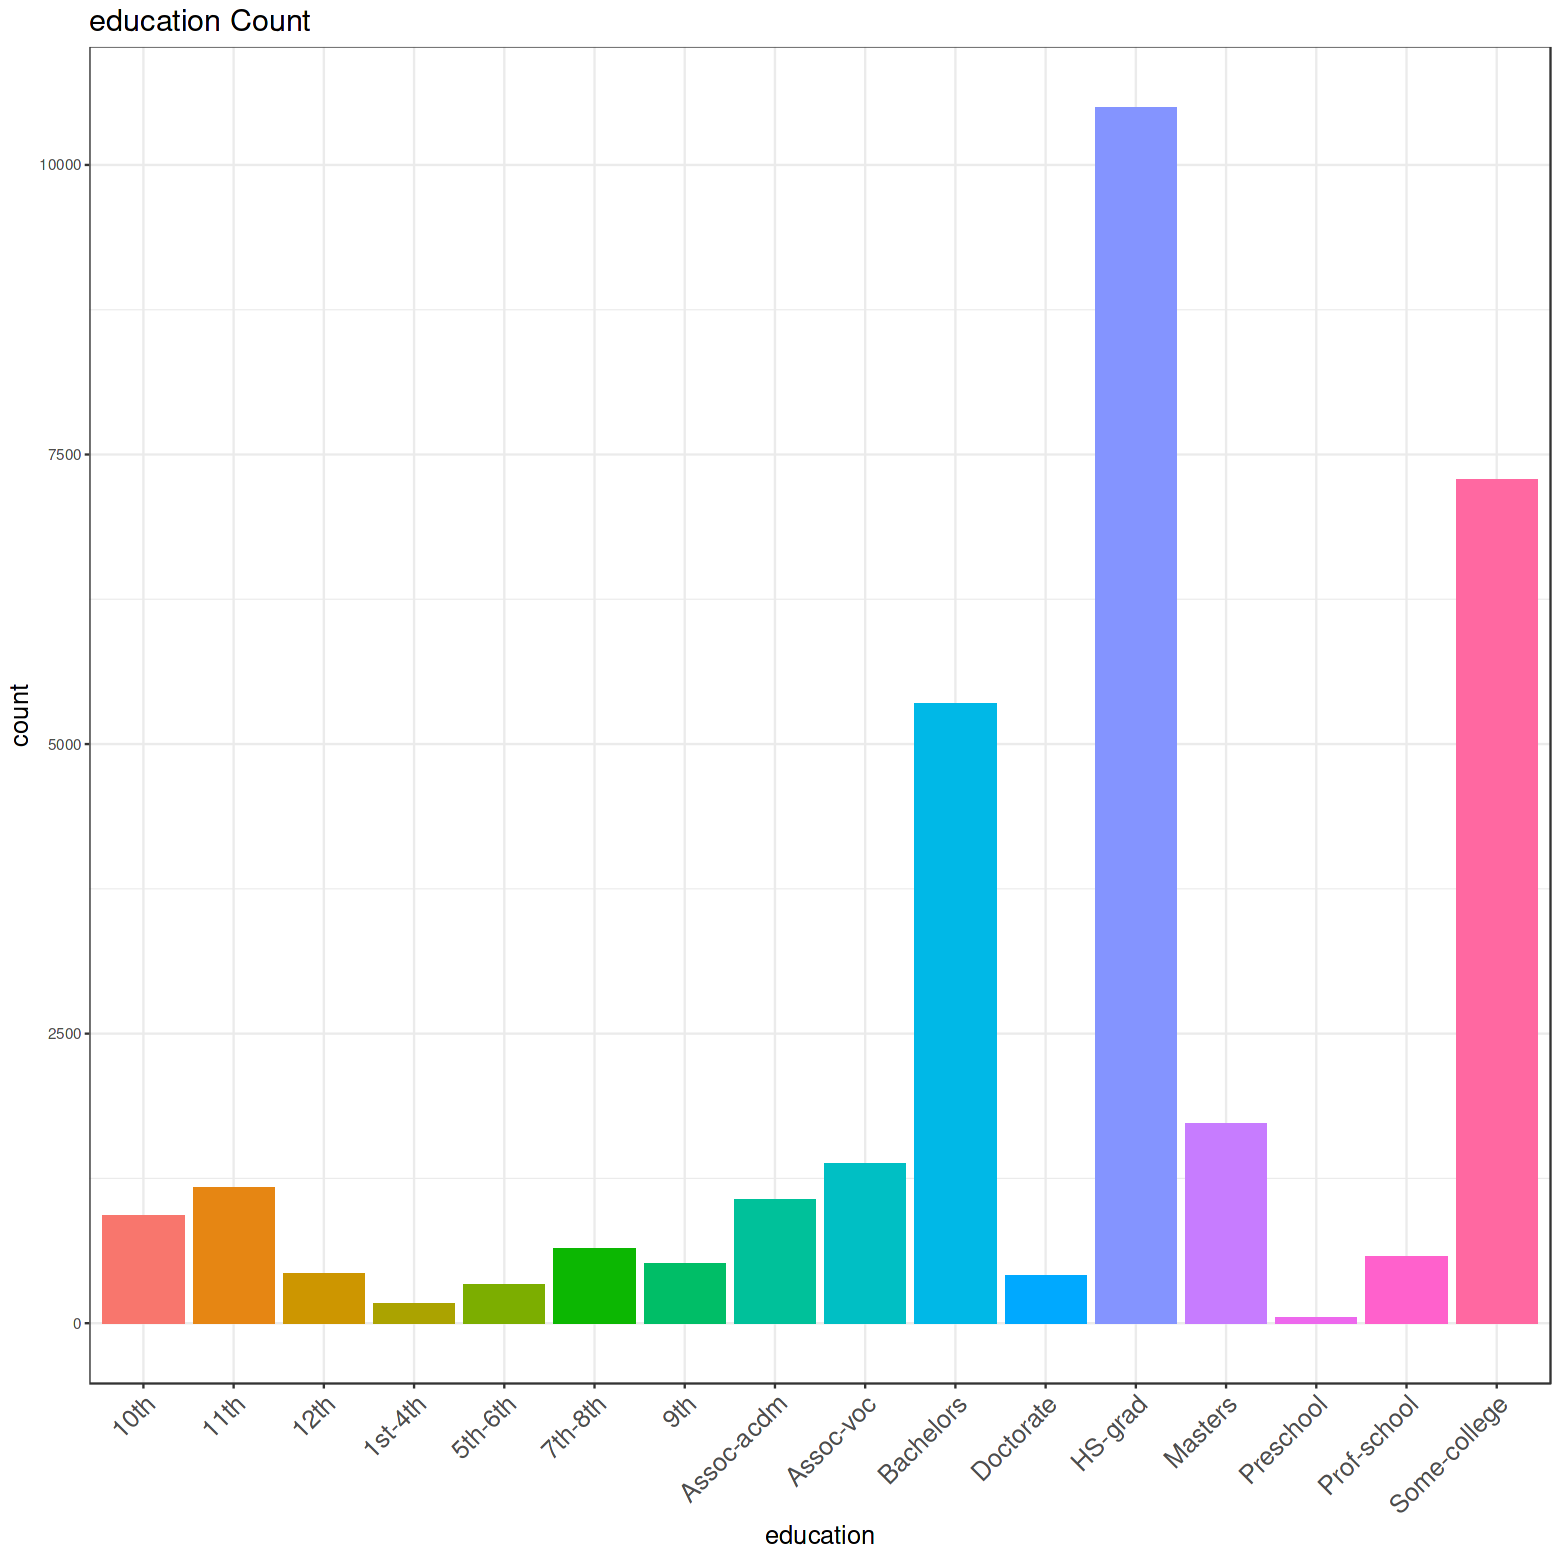

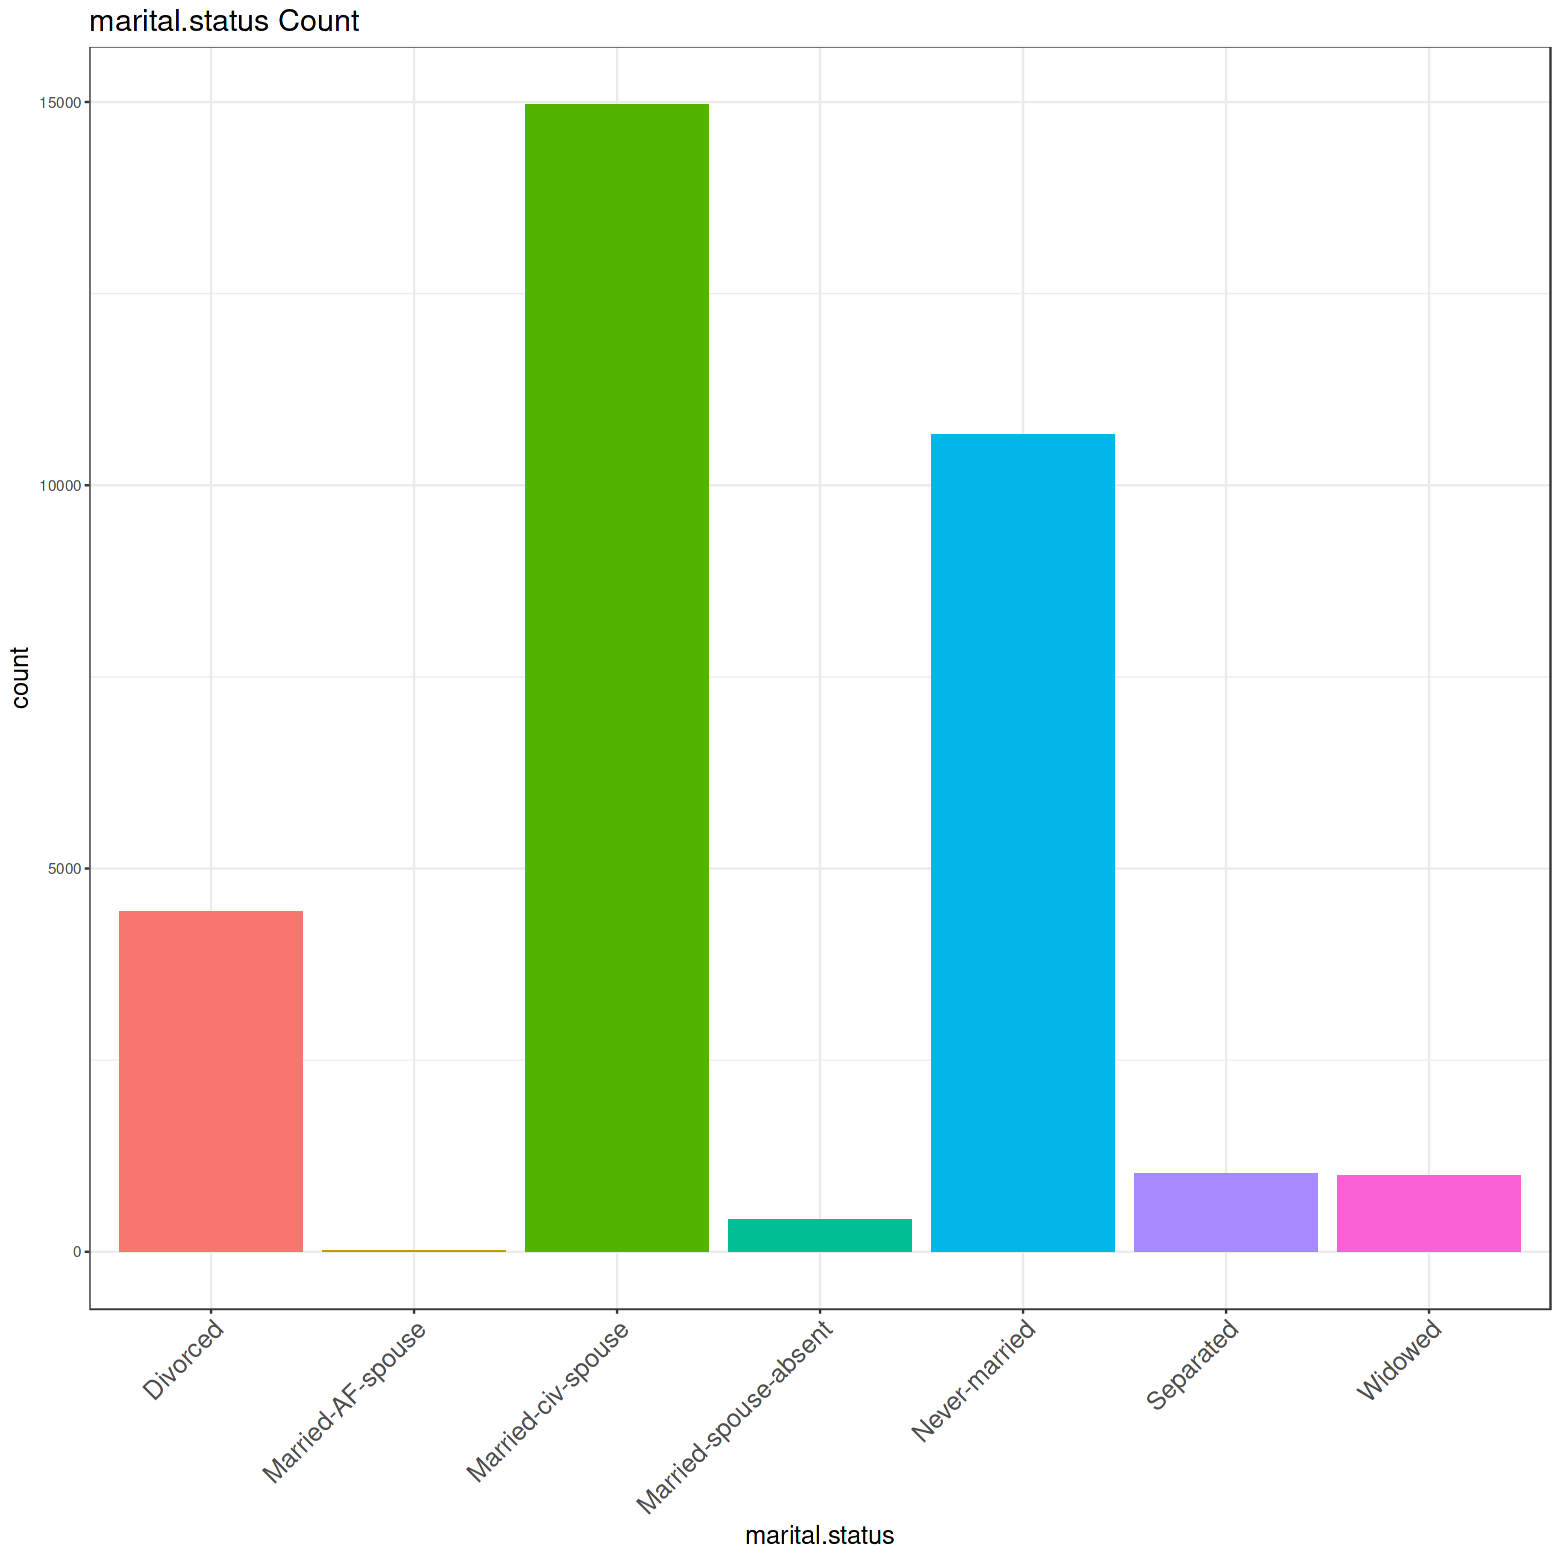

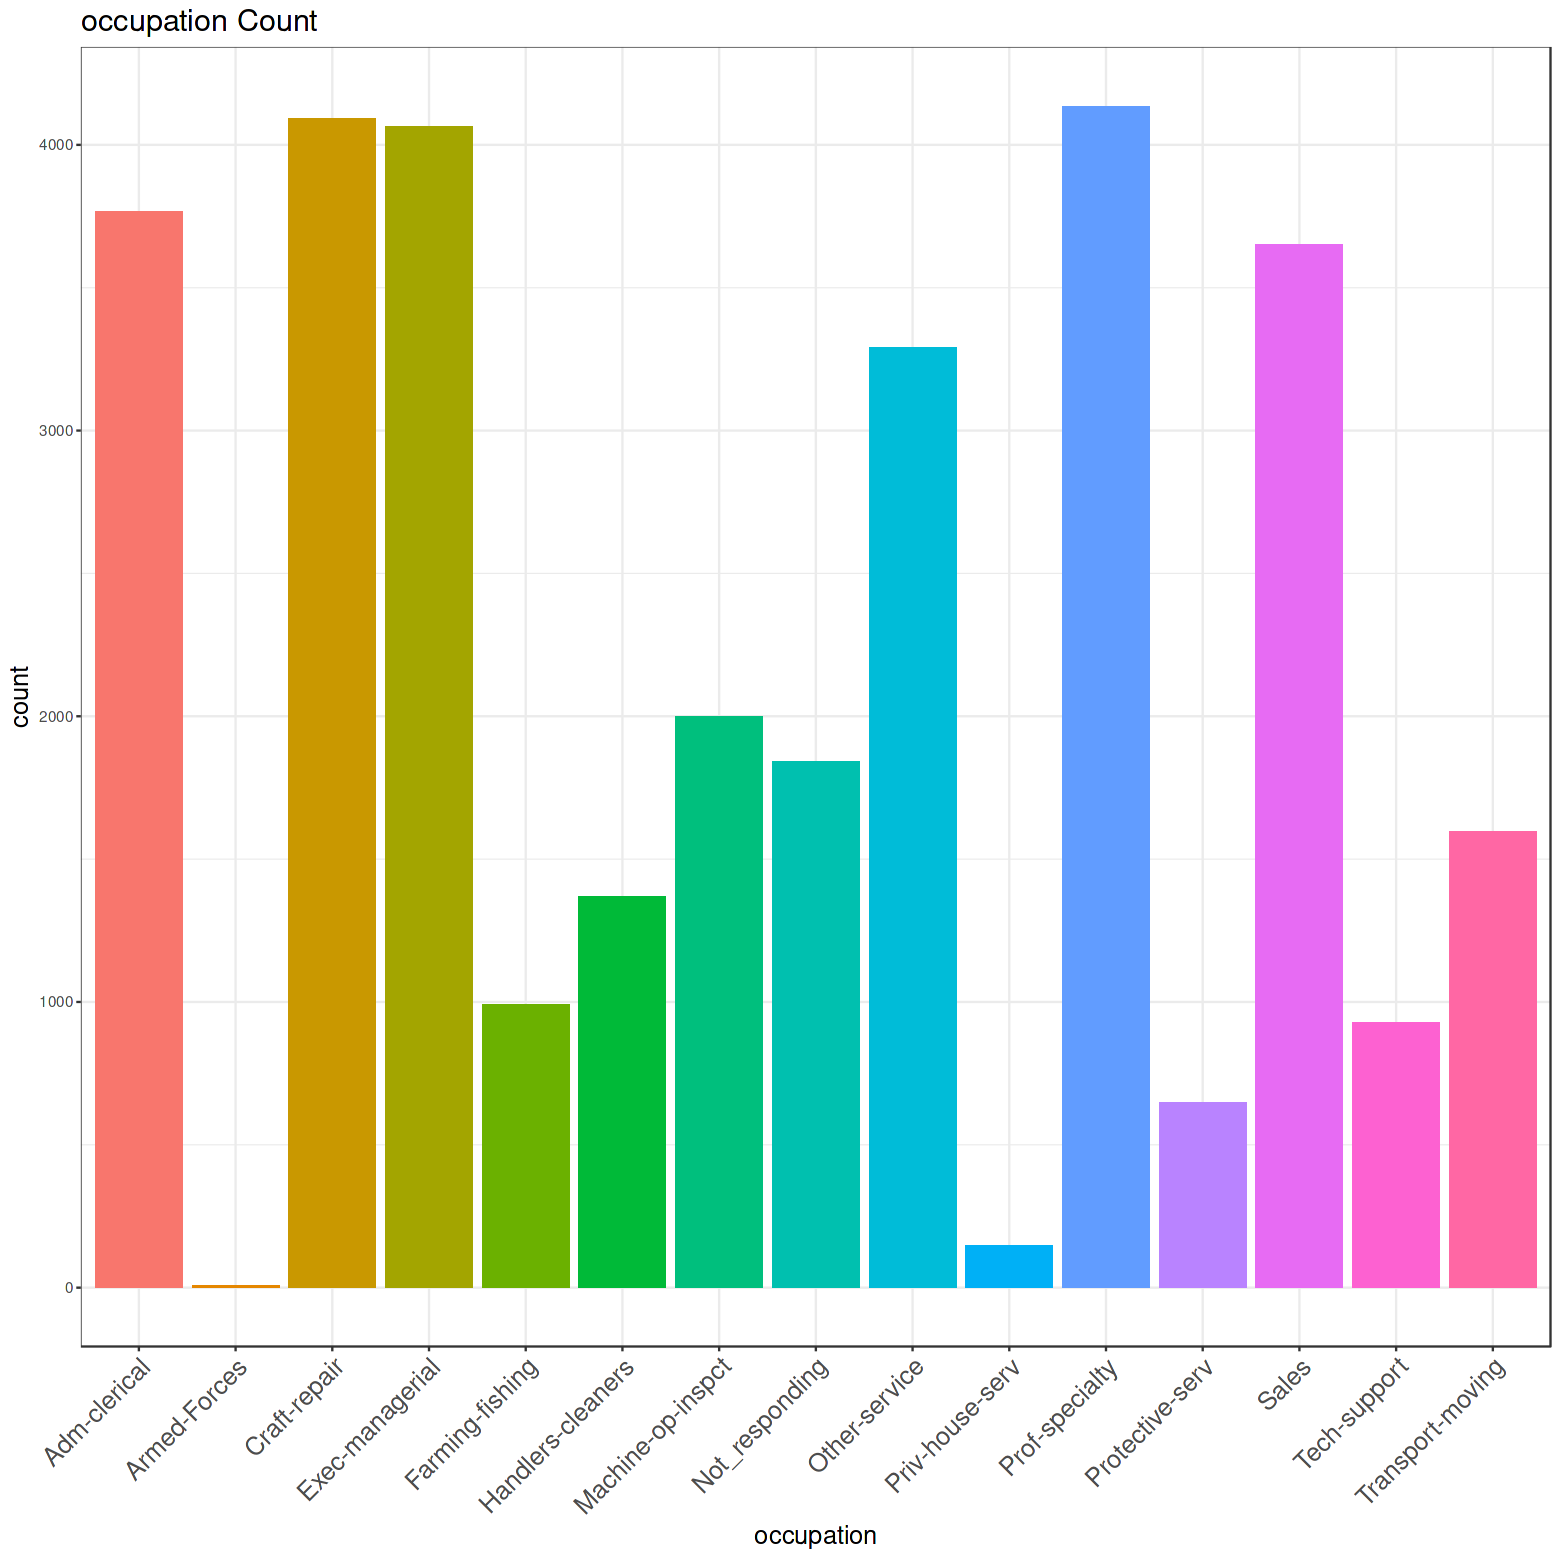

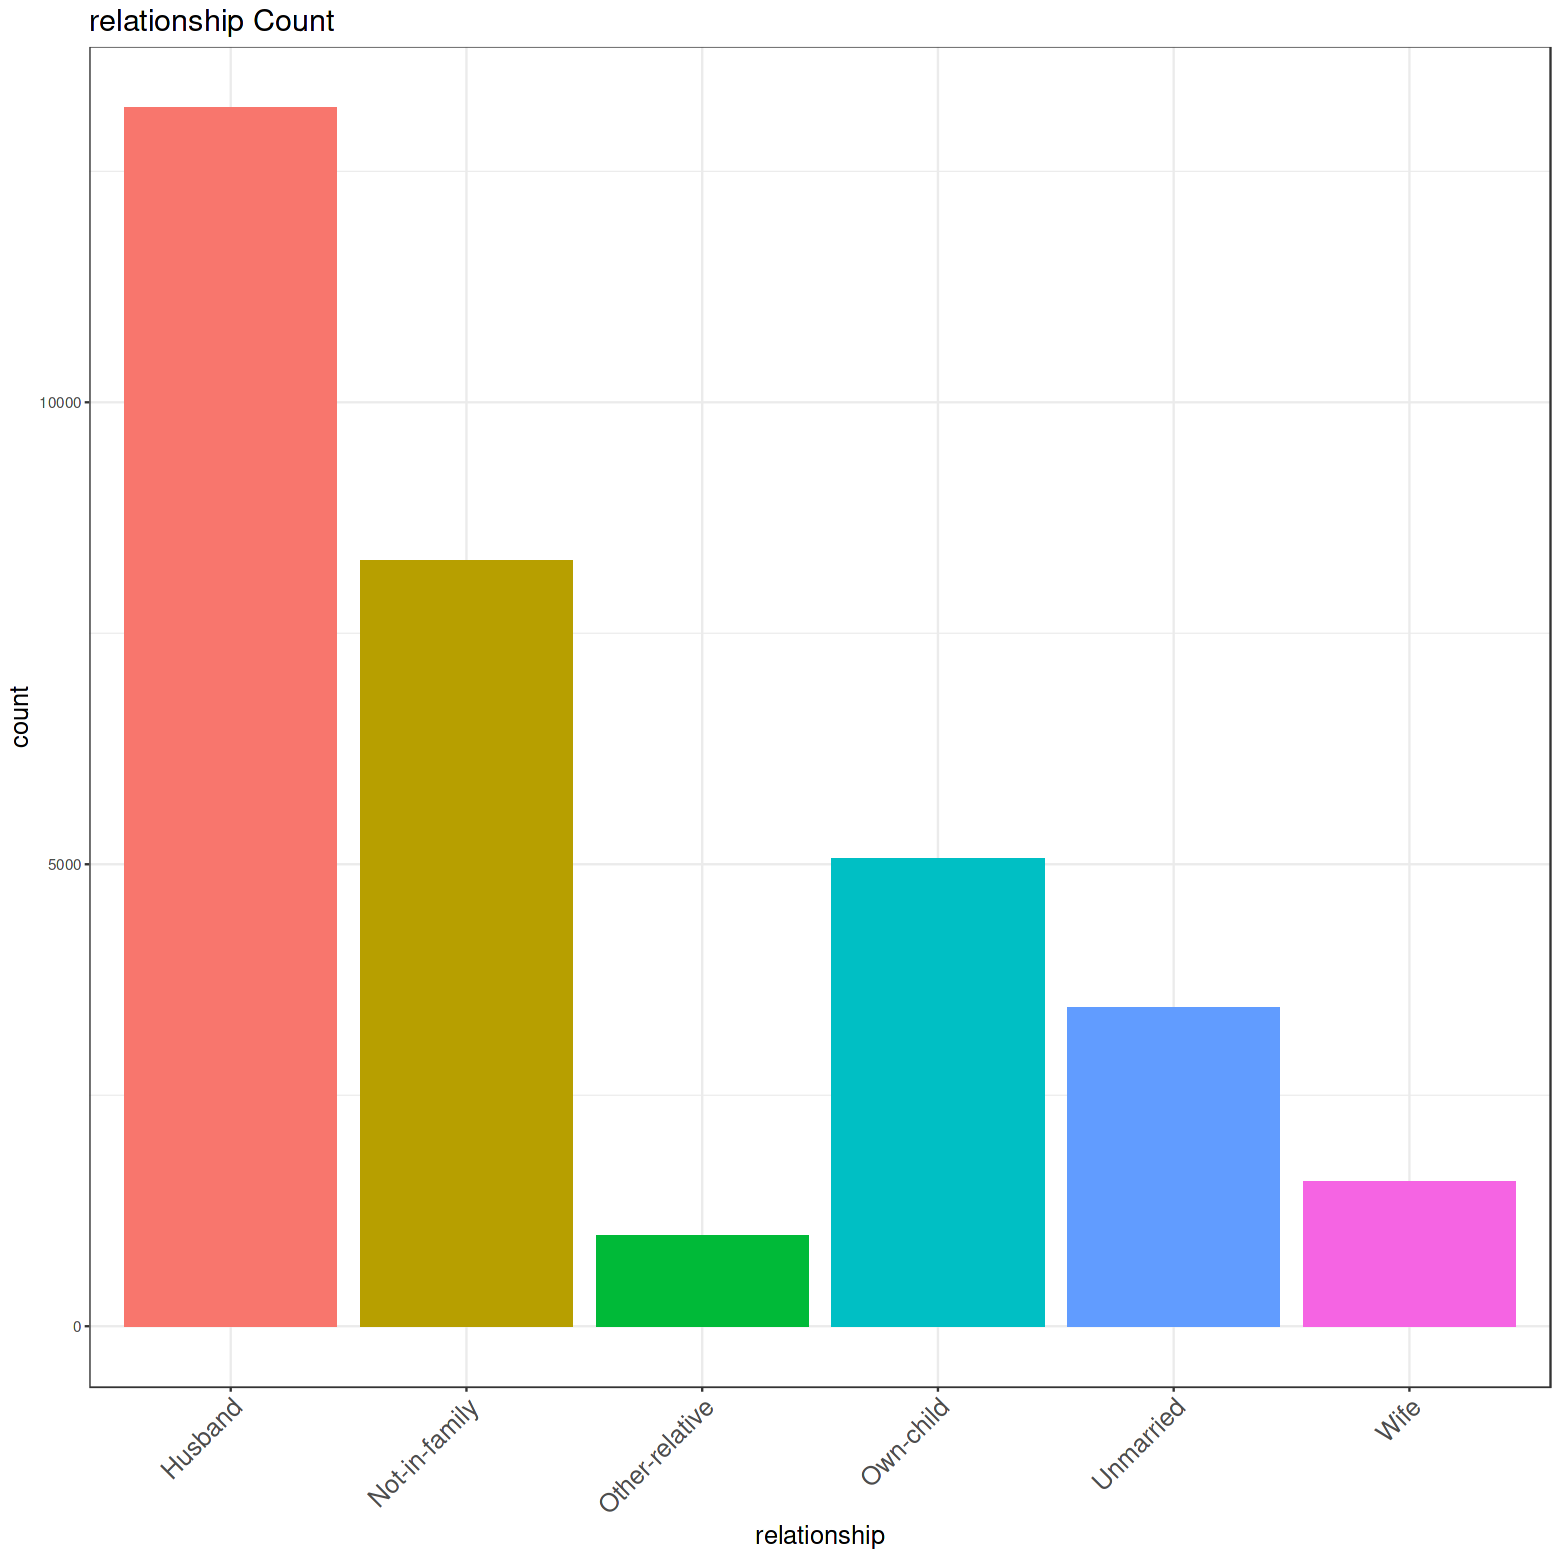

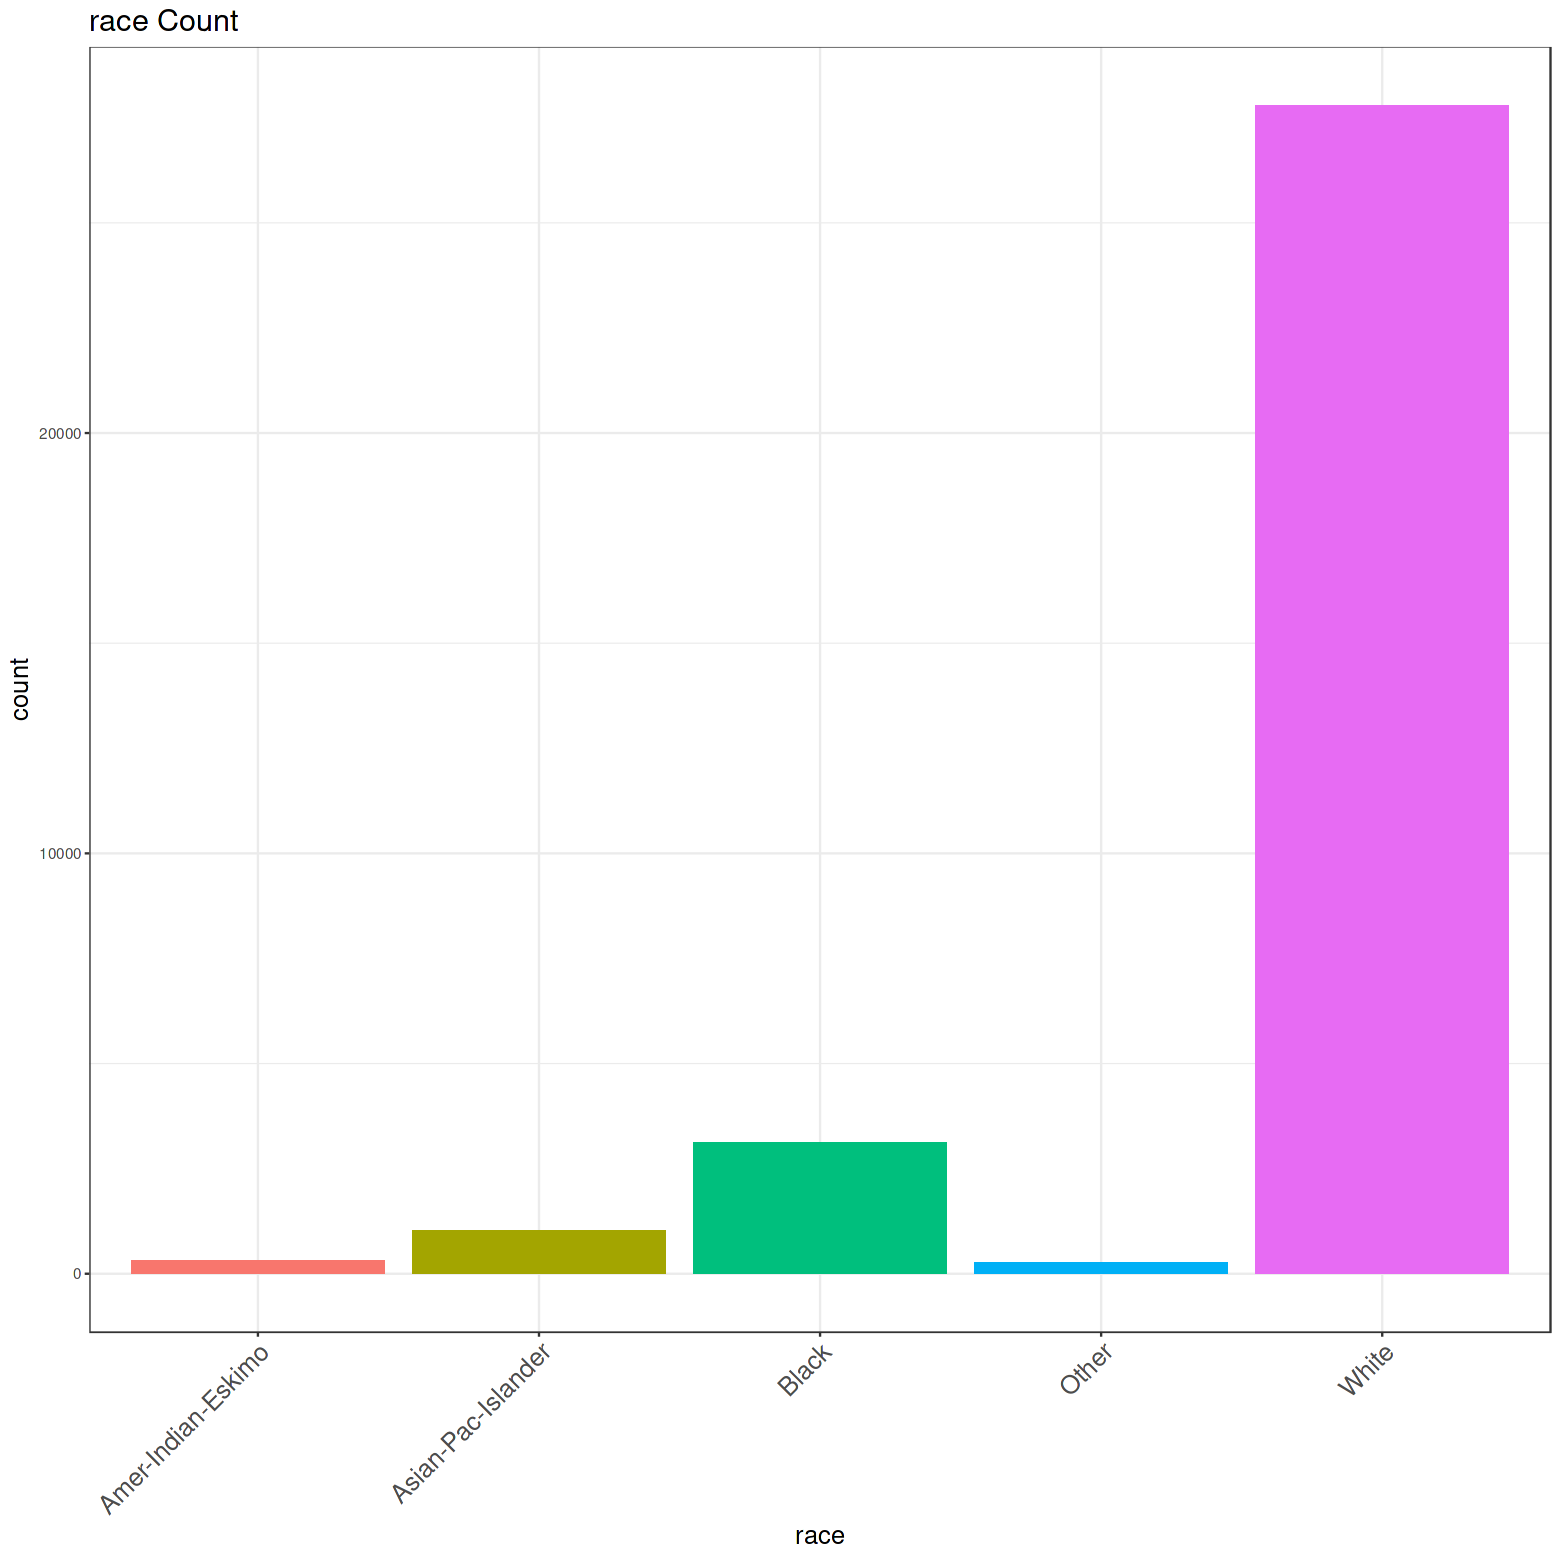

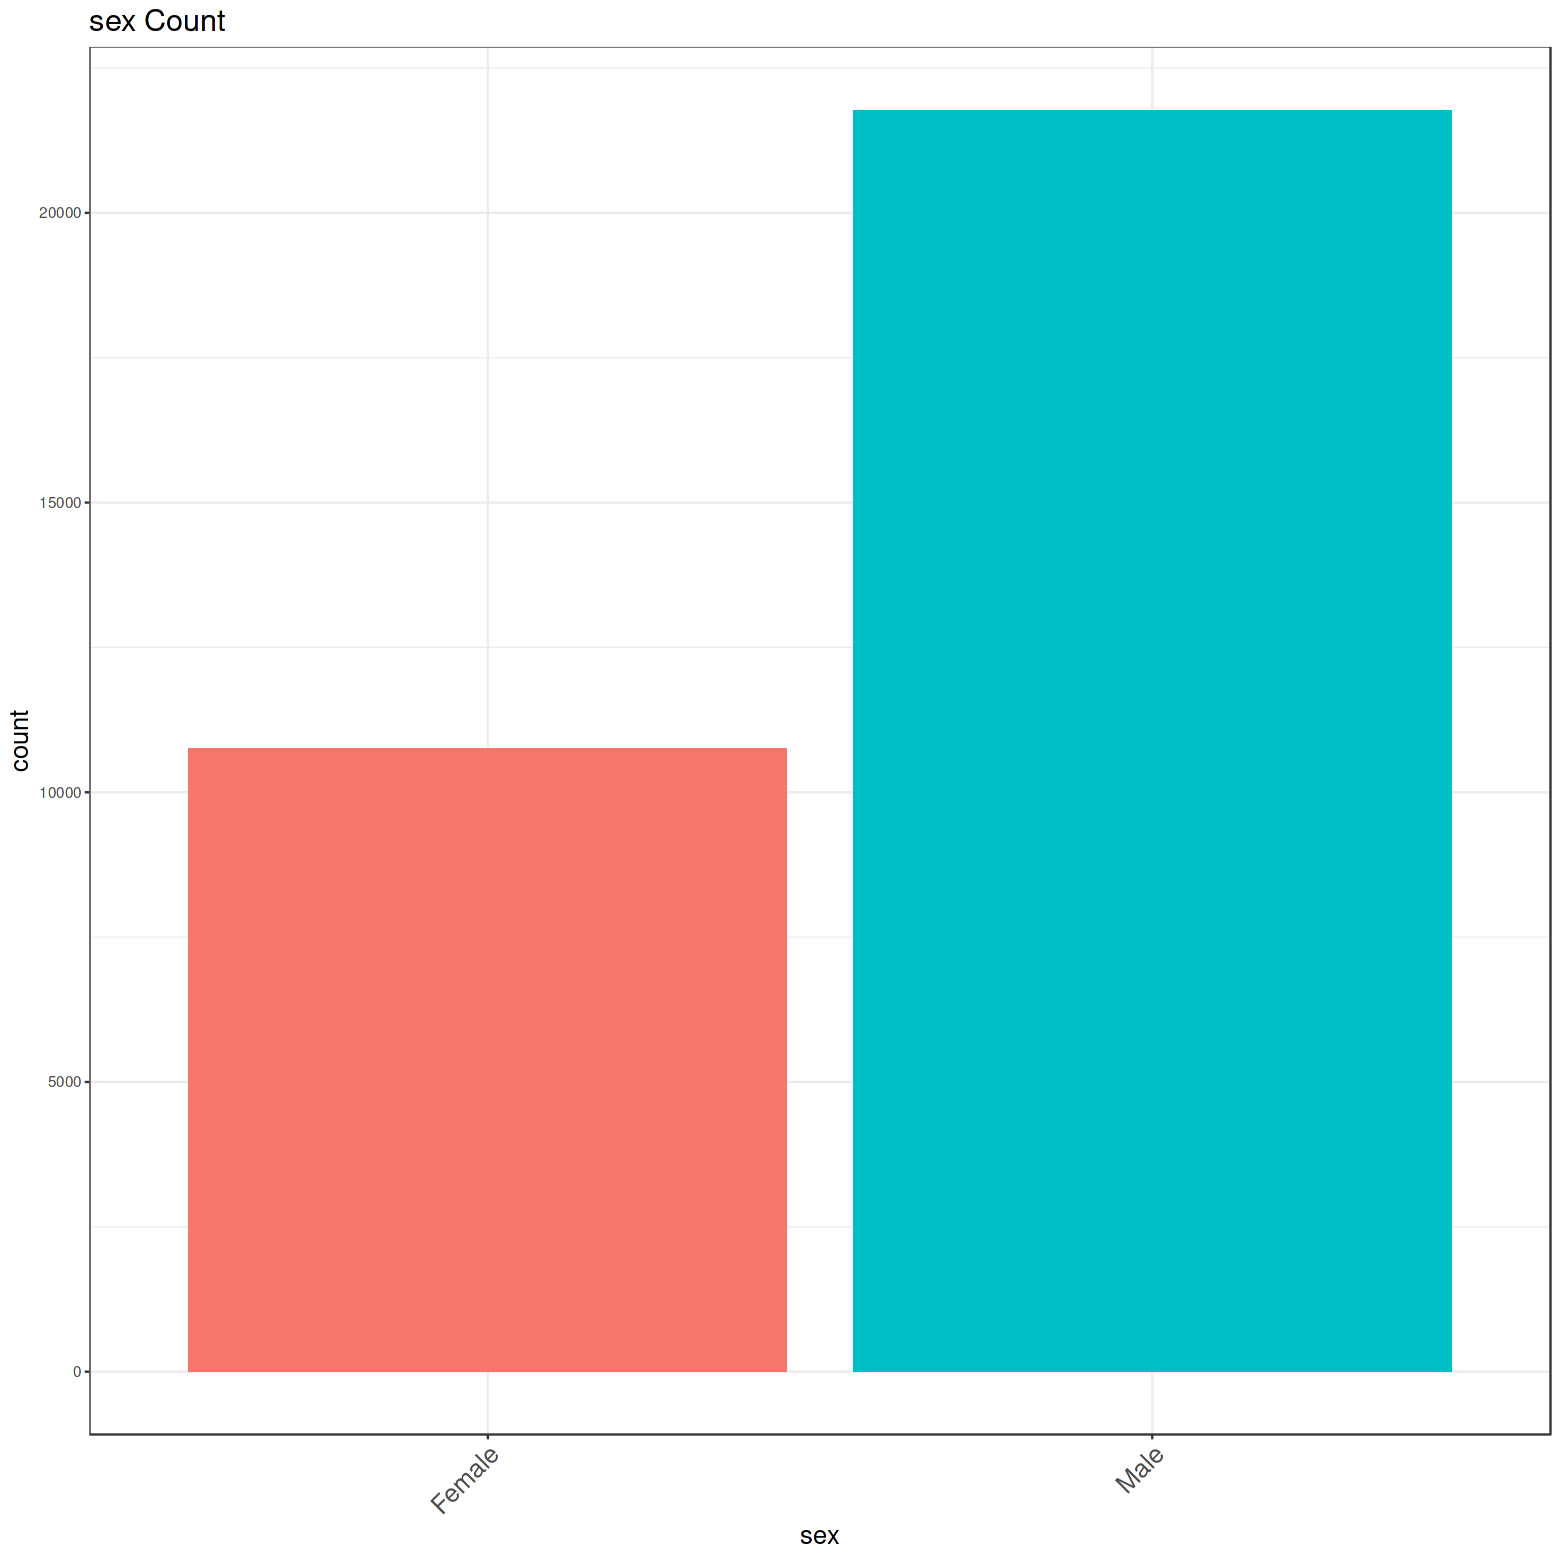

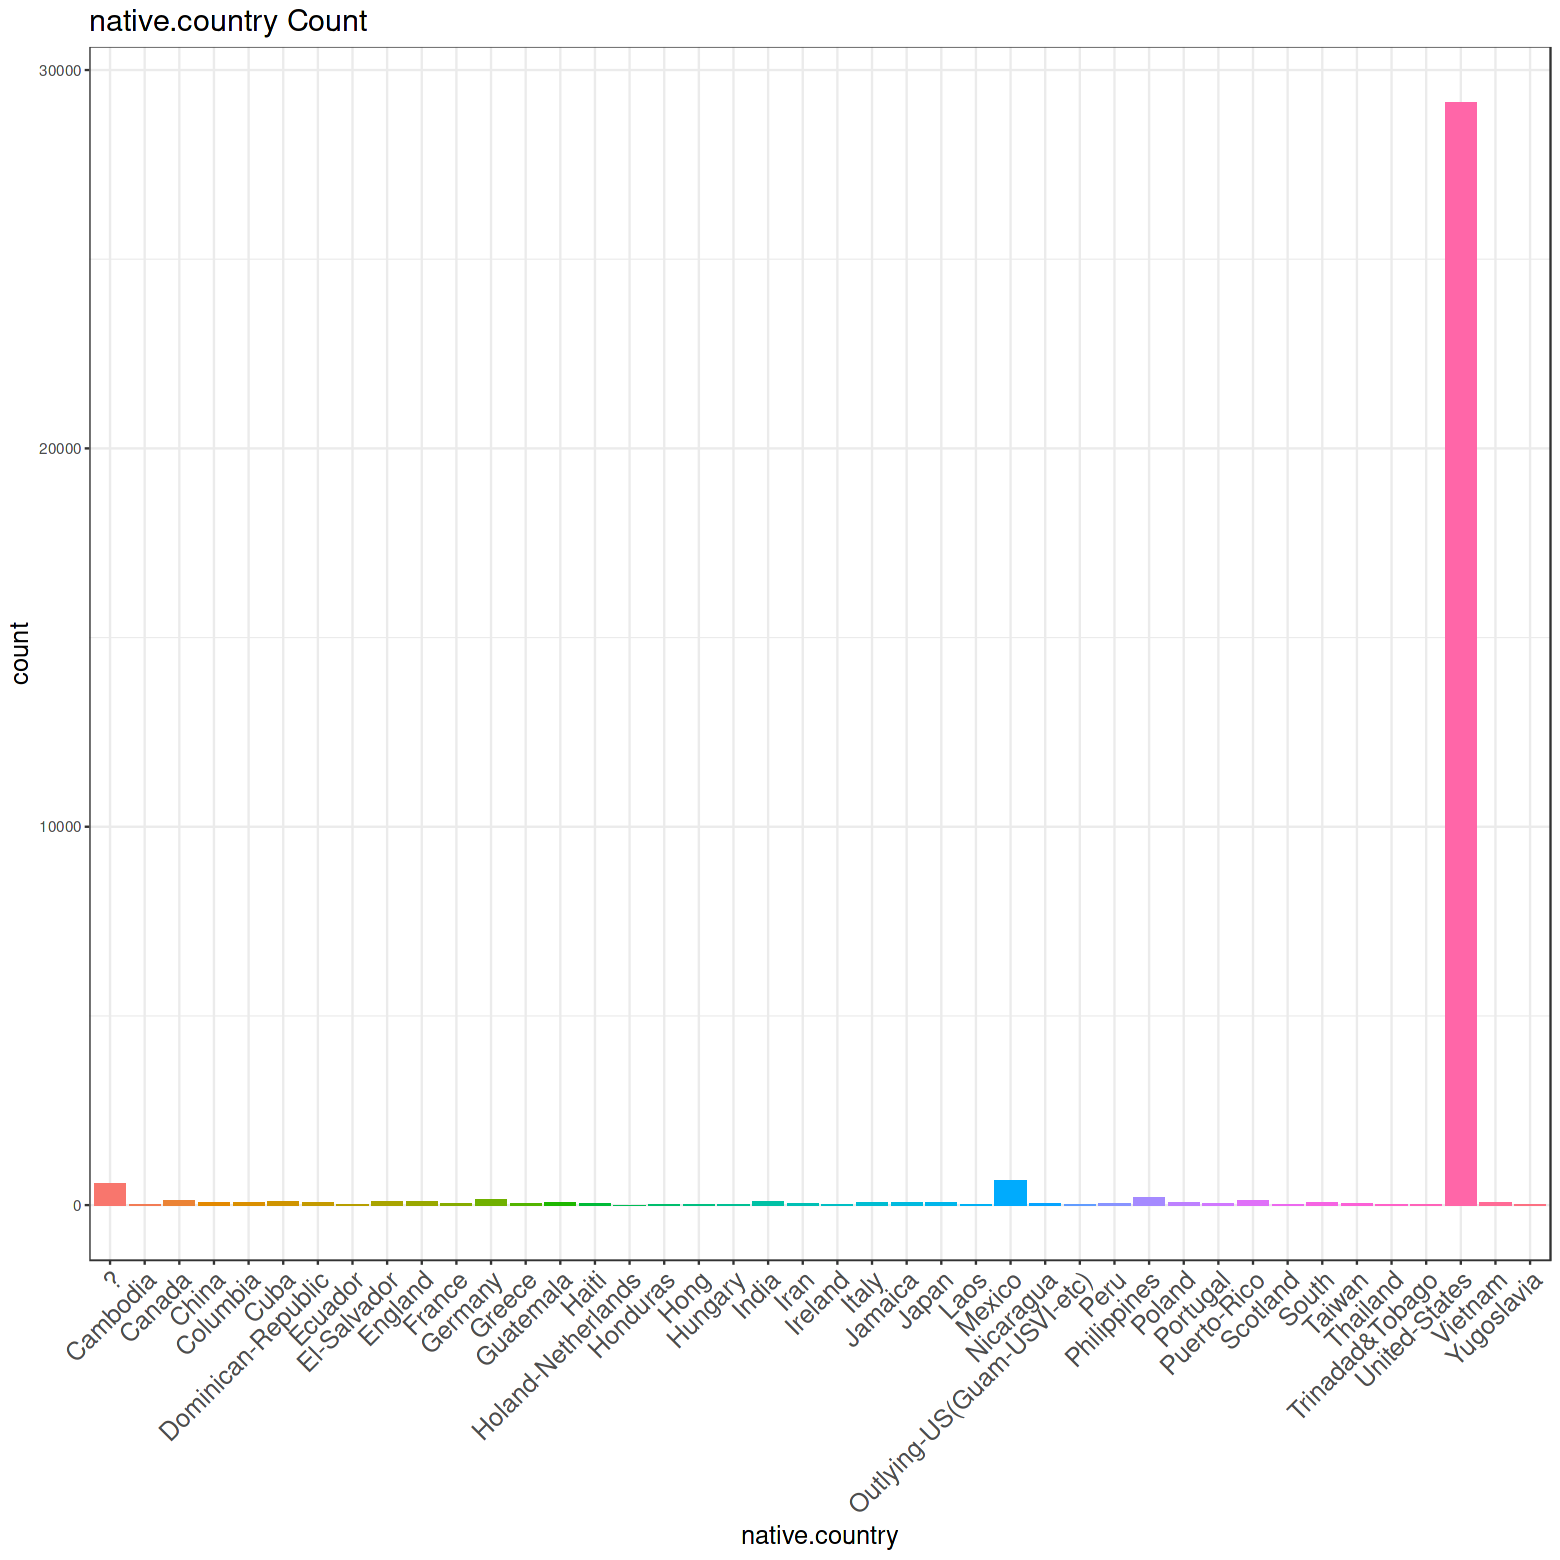

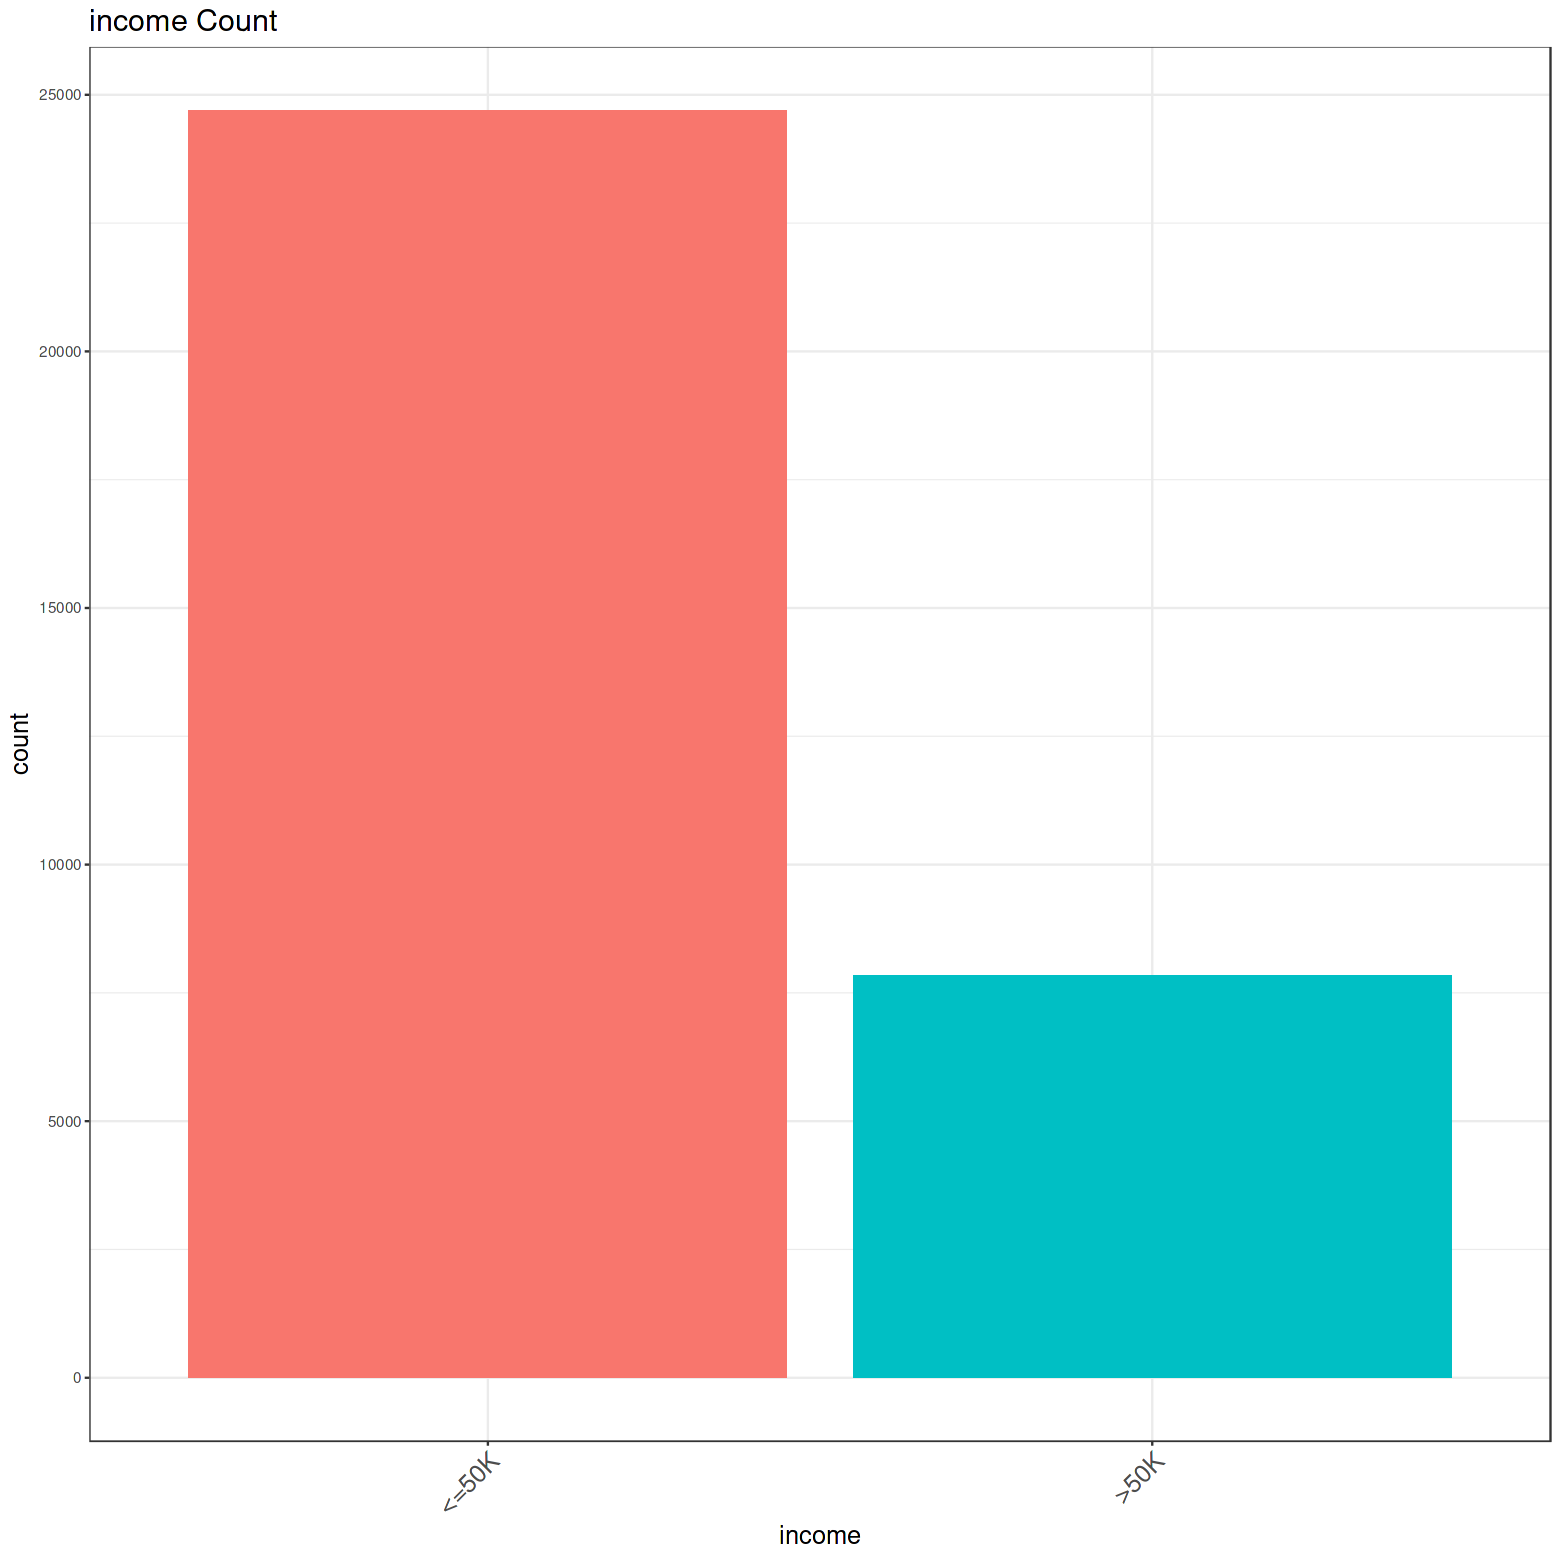

In [52]:
for(i in cat_cols)
{
    print(ggplot(data) +     
    geom_bar(aes(x=data[,i] , fill = data[,i])) +   
    theme_bw() +
    ggtitle(paste0(i,' Count')) + 
    xlab(i) +
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1 , angle = 45),
    title = element_text(size=15)
    ))
}

# **4. Modeling**

In [96]:
library(rpart)
library(Metrics)
library(caret)
library(mltools)
library(data.table)

In [54]:
data$income <- ifelse(data$income == '<=50K',0,1)

In [55]:
encoding_data <- one_hot(as.data.table(data))

In [72]:
idx <- sample(nrow(encoding_data), 0.7 * nrow(encoding_data))
train <- encoding_data[idx,]
test <- encoding_data[-idx,]

**Logistic Regression**

In [73]:
LRG <-  glm(income ~ . , data = train, family = 'binomial')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [74]:
summary(LRG)


Call:
glm(formula = income ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.2033  -0.5093  -0.1847  -0.0009   3.5733  

Coefficients: (10 not defined because of singularities)
                                              Estimate Std. Error z value
(Intercept)                                 -1.876e+01  5.926e+02  -0.032
age                                          2.438e-02  1.974e-03  12.354
`workclass_Federal-gov`                      1.542e+01  5.926e+02   0.026
`workclass_Local-gov`                        1.476e+01  5.926e+02   0.025
`workclass_Never-worked`                     3.821e+00  1.286e+03   0.003
workclass_Not_responding                     1.453e+01  5.926e+02   0.025
workclass_Private                            1.494e+01  5.926e+02   0.025
`workclass_Self-emp-inc`                     1.503e+01  5.926e+02   0.025
`workclass_Self-emp-not-inc`                 1.446e+01  5.926e+02   0.024
`workclass_State-gov`

In [77]:
pred_LR <- round(predict(LRG, test, type = "response"))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [85]:
cm <- confusionMatrix(factor(pred_LR), reference = factor(test$income))

In [89]:
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 6876  916
         1  544 1426
                                          
               Accuracy : 0.8504          
                 95% CI : (0.8432, 0.8575)
    No Information Rate : 0.7601          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5663          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9267          
            Specificity : 0.6089          
         Pos Pred Value : 0.8824          
         Neg Pred Value : 0.7239          
             Prevalence : 0.7601          
         Detection Rate : 0.7044          
   Detection Prevalence : 0.7982          
      Balanced Accuracy : 0.7678          
                                          
       'Positive' Class : 0               
                        

In [92]:
cm$overall[1]

Accuracy 
0.8504405

------

**Decision Tree**

In [100]:
tree <- rpart(income ~ ., data= train, method = "class")

In [101]:
summary(tree)

Call:
rpart(formula = income ~ ., data = train, method = "class")
  n= 22775 

          CP nsplit rel error    xerror        xstd
1 0.12588685      0 1.0000000 1.0000000 0.011747749
2 0.06603602      2 0.7482263 0.7482263 0.010560963
3 0.04002183      3 0.6821903 0.6821903 0.010181764
4 0.01000000      4 0.6421685 0.6421685 0.009935538

Variable importance
marital.status_Married-civ-spouse              relationship_Husband 
                               20                                18 
     marital.status_Never-married                      capital.gain 
                               11                                 9 
                    education.num        relationship_Not-in-family 
                                9                                 8 
                       sex_Female                          sex_Male 
                                7                                 7 
              education_Bachelors         occupation_Prof-specialty 
                   

In [102]:
printcp(tree)


Classification tree:
rpart(formula = income ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] capital.gain                      education.num                    
[3] marital.status_Married-civ-spouse

Root node error: 5497/22775 = 0.24136

n= 22775 

        CP nsplit rel error  xerror      xstd
1 0.125887      0   1.00000 1.00000 0.0117477
2 0.066036      2   0.74823 0.74823 0.0105610
3 0.040022      3   0.68219 0.68219 0.0101818
4 0.010000      4   0.64217 0.64217 0.0099355


In [105]:
pred_tree <- predict(tree,test , type = 'class')

In [107]:
cm <- confusionMatrix(factor(pred_tree), reference = factor(test$income))

In [108]:
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 7020 1155
         1  400 1187
                                          
               Accuracy : 0.8407          
                 95% CI : (0.8333, 0.8479)
    No Information Rate : 0.7601          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5091          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9461          
            Specificity : 0.5068          
         Pos Pred Value : 0.8587          
         Neg Pred Value : 0.7480          
             Prevalence : 0.7601          
         Detection Rate : 0.7191          
   Detection Prevalence : 0.8374          
      Balanced Accuracy : 0.7265          
                                          
       'Positive' Class : 0               
                        

In [109]:
cm$overall[1]

Accuracy 
0.8407089

**Thankyou. Please leave your advice in the comments**